In [ ]:
import sys
module_path = r"../src"
sys.oath.append(module_path)

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

/Users/tqh7876/Library/CloudStorage/OneDrive-Takeda/ActiveProjects/WearableSimulations/code/quantitative-sciences-nt1-detection-wearable-simulation


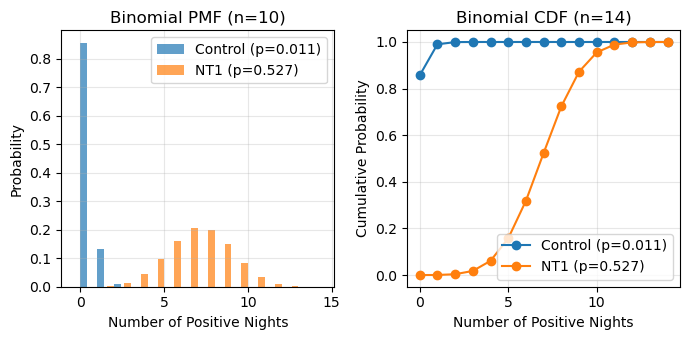

In [ ]:
from scipy.stats import binom

# Parameters
n = 14  # number of nights
p_nt1 = 0.527  # NT1 probability
p_con = 0.011  # control probability
x = np.arange(0, n + 1)

# PMF and CDF for NT1
pmf_nt1 = binom.pmf(x, n, p_nt1)
cdf_nt1 = binom.cdf(x, n, p_nt1)

# PMF and CDF for Control
pmf_con = binom.pmf(x, n, p_con)
cdf_con = binom.cdf(x, n, p_con)

# Plot
fig, axes = plt.subplots(ncols=2, figsize=(7, 3.5))

# PMF Plot
axes[0].bar(x + 0.2, pmf_con, width=0.4, label='Control (p=0.011)', alpha=0.7)
axes[0].bar(x - 0.2, pmf_nt1, width=0.4, label='NT1 (p=0.527)', alpha=0.7)
axes[0].set_title('Binomial PMF (n=10)')
axes[0].set_xlabel('Number of Positive Nights')
axes[0].set_ylabel('Probability')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# CDF Plot
axes[1].plot(x, cdf_con, marker='o', label='Control (p=0.011)')
axes[1].plot(x, cdf_nt1, marker='o', label='NT1 (p=0.527)')
axes[1].set_title('Binomial CDF (n=14)')
axes[1].set_xlabel('Number of Positive Nights')
axes[1].set_ylabel('Cumulative Probability')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

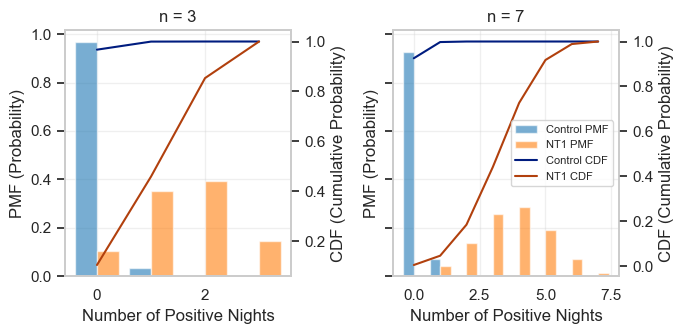

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns

sns.set(style='whitegrid')

# Parameters
p_con = 0.011
p_nt1 = 0.527
n_values = [3, 7]

# Get dark palette
colors = sns.color_palette("dark", 2)
con_color = colors[0]  # Blue-ish
nt1_color = colors[1]  # Orange-ish

# Set up plot
fig, axes = plt.subplots(1, len(n_values), figsize=(7, 3.5), sharey=True)

for idx, n in enumerate(n_values):
    ax1 = axes[idx]
    x = np.arange(0, n + 1)

    # PMFs
    pmf_con = binom.pmf(x, n, p_con)
    pmf_nt1 = binom.pmf(x, n, p_nt1)

    # CDFs
    cdf_con = binom.cdf(x, n, p_con)
    cdf_nt1 = binom.cdf(x, n, p_nt1)

    # Bar plots for PMF
    width = 0.4
    bars_con = ax1.bar(x - width/2, pmf_con, width=width, label='Control PMF', color='tab:blue', alpha=0.6)
    bars_nt1 = ax1.bar(x + width/2, pmf_nt1, width=width, label='NT1 PMF', color='tab:orange', alpha=0.6)
    ax1.set_xlabel("Number of Positive Nights")
    ax1.set_ylabel("PMF (Probability)")
    ax1.set_title(f'n = {n}')
    ax1.grid(True, alpha=0.3)

    # Line plots for CDF (right y-axis)
    ax2 = ax1.twinx()
    line_con, = ax2.plot(x, cdf_con, color=con_color, linestyle='-', label='Control CDF')
    line_nt1, = ax2.plot(x, cdf_nt1, color=nt1_color, linestyle='-', label='NT1 CDF')
    ax2.set_ylabel("CDF (Cumulative Probability)")

    # Handle legends
    if idx == len(n_values) - 1:
        lines = [bars_con[0], bars_nt1[0], line_con, line_nt1]
        labels = ['Control PMF', 'NT1 PMF', 'Control CDF', 'NT1 CDF']
        ax2.legend(lines, labels, loc='center right', fontsize=8) # , bbox_to_anchor=(1.05, 1))

    ax2.grid(False)

plt.tight_layout()

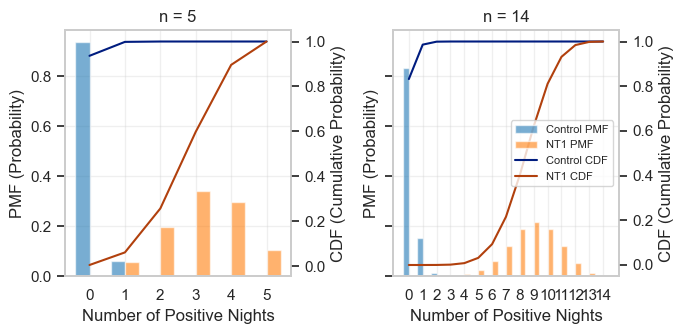

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns

sns.set(style='whitegrid')

# Parameters
p_con = 64 / (64 + 4838)
p_nt1 = 96 / (55 + 96)
n_values = [5, 14]

# Get dark palette
colors = sns.color_palette("dark", 2)
con_color = colors[0]  # Blue-ish
nt1_color = colors[1]  # Orange-ish

# Set up plot
fig, axes = plt.subplots(1, len(n_values), figsize=(7, 3.5), sharey=True)

for idx, n in enumerate(n_values):
    ax1 = axes[idx]
    x = np.arange(0, n+1)  # Extend to 0 through 8 regardless of n

    # PMFs and CDFs for the range up to max x
    pmf_con = binom.pmf(x, n, p_con)
    pmf_nt1 = binom.pmf(x, n, p_nt1)
    cdf_con = binom.cdf(x, n, p_con)
    cdf_nt1 = binom.cdf(x, n, p_nt1)

    # Bar plots for PMF
    width = 0.4
    bars_con = ax1.bar(x - width/2, pmf_con, width=width, label='Control PMF', color='tab:blue', alpha=0.6)
    bars_nt1 = ax1.bar(x + width/2, pmf_nt1, width=width, label='NT1 PMF', color='tab:orange', alpha=0.6)

    ax1.set_xlabel("Number of Positive Nights")
    ax1.set_ylabel("PMF (Probability)")
    ax1.set_title(f'n = {n}')
    ax1.set_xticks(np.arange(0, n + 1))  # Force x-axis ticks 0–8
    ax1.grid(True, alpha=0.3)

    # Line plots for CDF (right y-axis)
    ax2 = ax1.twinx()
    line_con, = ax2.plot(x, cdf_con, color=con_color, linestyle='-', label='Control CDF')
    line_nt1, = ax2.plot(x, cdf_nt1, color=nt1_color, linestyle='-', label='NT1 CDF')
    ax2.set_ylabel("CDF (Cumulative Probability)")

    # Handle legends
    if idx == len(n_values) - 1:
        lines = [bars_con[0], bars_nt1[0], line_con, line_nt1]
        labels = ['Control PMF', 'NT1 PMF', 'Control CDF', 'NT1 CDF']
        ax2.legend(lines, labels, loc='center right', fontsize=8)

    ax2.grid(False)

plt.tight_layout()
plt.show()

## Seaborn plots 

In [6]:
from scipy.stats import binom

# ----- Parameters -----
p_con = 63 / (63 + 4823)
p_nt1 = 92 / (49 + 92)
n_recs_all = [5, 14]

# Build a tidy dataframe with exact PMF weights for each n and group
def build_pmf_df(n, p_con, p_nt1):
    x = np.arange(0, n + 1)
    df = pd.DataFrame({
        "n_pos_recs": np.tile(x, 2),
        "Dx": np.repeat(["control", "NT1"], len(x)),
        "n": n,
        "weight": np.concatenate([binom.pmf(x, n, p_con), binom.pmf(x, n, p_nt1)])
    })
    return df

df_all = pd.concat([build_pmf_df(n, p_con, p_nt1) for n in n_recs_all], ignore_index=True)
df_all.head()

,n_pos_recs,Dx,n,weight
0,0,control,5,9.371713e-01
1,1,control,5,6.120858e-02
2,2,control,5,1.599063e-03
3,3,control,5,2.088762e-05
4,4,control,5,1.364213e-07


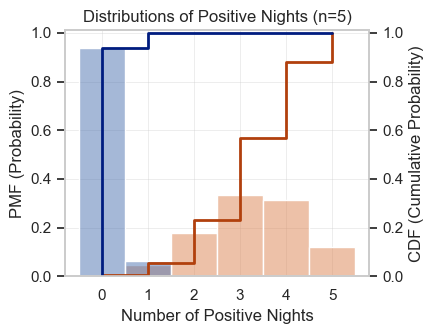

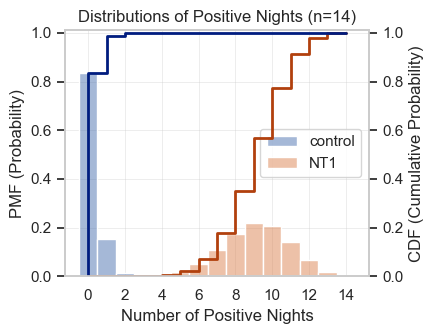

In [ ]:
sns.set(style='whitegrid')

for i, n_recs in enumerate(n_recs_all):
    # ----- Plot -----
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.5), sharey=True)

    df_n = df_all.query("n == @n_recs").copy()

    # PMF as weighted bars (per-hue normalized probability)
    sns.histplot(
        data=df_n,
        x="n_pos_recs",
        hue="Dx",
        hue_order=["control", "NT1"],
        ax=ax,
        stat="probability",
        common_norm=False,
        multiple="layer",
        shrink=1,
        discrete=True,
        weights="weight"
    )

    ax.set_xlabel("Number of Positive Nights")
    
    ax.set_ylabel("PMF (Probability)")
    ax.set_title(f"Distributions of Positive Nights (n={n_recs})")
    ax.set_ylim(0, 1.01)
    ax.grid(True, which='major', axis='both', linestyle='-', linewidth=0.5, alpha=0.5)
    # xticks
    max_ticks = 8
    xticks = np.linspace(0, n_recs, num=min(max_ticks, n_recs+1), dtype=int)
    ax.set_xticks(xticks)

    # CDF on twin axis via weighted ECDF
    ax2 = ax.twinx()
    sns.ecdfplot(
        data=df_n,
        x="n_pos_recs",
        hue="Dx",
        hue_order=["control", "NT1"],
        ax=ax2,
        weights="weight",
        palette="dark",
        lw=2
    )
    ax2.set_ylabel("CDF (Cumulative Probability)")
    ax2.set_ylim(0, 1.01)
    ax2.grid(False)

    # Legends: keep only one combined legend on the right-most panel
    leg1 = ax.get_legend()
    if leg1:
        if i == len(n_recs_all) - 1:
            leg1.set_title(None)
            leg1.set_loc("center right")
        else:
            leg1.remove()

    leg2 = ax2.get_legend()
    if leg2:
        leg2.remove()

    plt.tight_layout()
    

In [8]:
import numpy as np
from scipy.stats import binom

def binomial_metrics(n, t, SE1, SP1, prevalence=1/2048):
    """
    Compute prevalence-adjusted performance for rule: test+ if ≥ t positives out of n nights.
    Inputs:
      n, t     : integers (n ≥ 1, 1 ≤ t ≤ n)
      SE1      : per-night sensitivity (NT1)
      SP1      : per-night specificity (controls)
      prevalence: case prevalence (default 1/2048)
    Returns (all as proportions of the screened population, not scaled):
      dict with SE, SP, TP, FP, TN, FN, PPV, NPV, LR_pos, LR_neg
    """
    # Rates from binomial model
    SE = 1.0 - binom.cdf(t - 1, n, SE1)       # sensitivity = P(X ≥ t | NT1)
    SP =        binom.cdf(t - 1, n, 1.0-SP1)  # specificity = P(X <  t | Control)

    # Prevalence-adjusted counts (as proportions)
    pi1 = float(prevalence)
    pi0 = 1.0 - pi1
    TP = SE * pi1
    FN = (1.0 - SE) * pi1
    FP = (1.0 - SP) * pi0
    TN = SP * pi0

    # Derived metrics
    PPV = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    NPV = TN / (TN + FN) if (TN + FN) > 0 else 0.0
    LR_pos = SE / (1.0 - SP) if (1.0 - SP) > 0 else np.inf
    LR_neg = (1.0 - SE) / SP if SP > 0 else np.inf
    FP_to_TP = FP / TP if TP > 0 else np.inf

    return dict(SE=SE, SP=SP, TP=TP, FP=FP, TN=TN, FN=FN,
                PPV=PPV, NPV=NPV, LR_pos=LR_pos, LR_neg=LR_neg,
                FP_to_TP=FP_to_TP)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

# Parameters
p_con = 64 / (64 + 4838)
p_nt1 = 96 / (55 + 96)
n_recs = 14
thresholds = 5 # minimum number of positive nights required
prevalence = 1 / 2048  # True prevalence

nights = np.arange(1, 14)  # number of nights from 1 to 10

# Store results
results = []

for n in range(1, n_recs + 1):
    for t in range(1, min(n+1, 1+thresholds)):
        
        metrics = binomial_metrics(n=n, t=t, SE1=p_nt1, SP1=1 - p_con)  # prevalence defaults to 1/2048

        results.append({
            'Recordings (n)': n,
            'Min. required positive (n)': t,
            **metrics
        })

df_out = pd.DataFrame(results)
df_out['Recordings (n)'].value_counts()



Recordings (n)
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
4     4
3     3
2     2
1     1
Name: count, dtype: int64

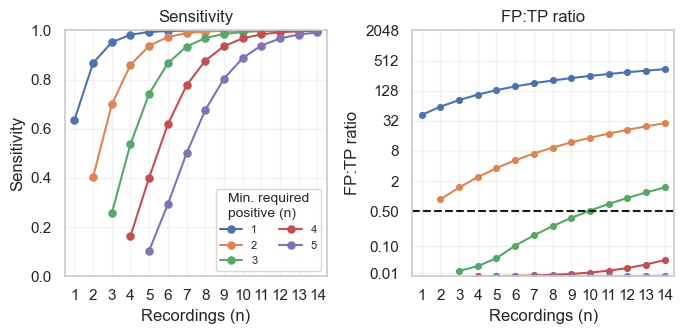

In [ ]:

# Create plots
fig, axes = plt.subplots(ncols=2, figsize=(7, 3.5))

# Sensitivity plot
sns.pointplot(data=df_out, hue='Min. required positive (n)', y='SE', x='Recordings (n)', palette='deep', ax=axes[0], markers='o', ms=5, lw=1.5)
axes[0].set_title('Sensitivity')
axes[0].set_ylabel('Sensitivity')
axes[0].grid(True, alpha=0.25)
axes[0].set_ylim([0, 1])
axes[0].legend().remove()
axes[0].legend(title='Min. required\npositive (n)', loc='lower right', ncols=2, fontsize=8, title_fontsize=10)

# FP:TP Ratio plot
sns.pointplot(data=df_out, hue='Min. required positive (n)', y='FP_to_TP', x='Recordings (n)', palette='deep', ax=axes[1], markers='o', ms=4, lw=1.5)
axes[1].set_title('FP:TP ratio')
axes[1].set_ylabel('FP:TP ratio')
axes[1].grid(True, alpha=0.25)
# axes[1].axhline(y=max_FPTP, color='black', linestyle='--', label='Max FP:TP')

ticks = [0.01, 0.1, 0.5, 2, 8, 32,  128,  512, 2048]
axes[1].set_yscale('symlog', base=2, linthresh=0.1)
axes[1].set_ylim([0, 2e3])
axes[1].set_yticks(ticks)
axes[1].set_yticklabels([f'{tick:.2f}' if tick < 1 else f'{tick}' for tick in ticks])
axes[1].legend().remove()
axes[1].axhline(0.5, ls='--', color='k')

# F1 score plot
# sns.pointplot(data=df_, hue='Min. required positive (n)', y='F1 score (min. PPV)', x='Recordings (n)', palette='deep', ax=axes[2], markers='o')
# axes[2].set_title(f'F1 score (FP:TP < {max_FPTP:.1f})')
# axes[2].set_ylabel('F1 score')
# axes[2].grid(True, alpha=0.25)
# axes[2].set_ylim([0, 1])
# axes[2].legend(title='Min. required positive (n)', loc='lower center', ncols=3)

plt.tight_layout()